## Анализ топ-200 видео YouTube в выдаче по запросу "A/Б тестирование" 

В данном мини-проекте проведен анализ топ-200 видео YouTube (по количеству наибольшего числа просмотров) в выдаче по запросу "а/б тестирование". 

Данные о видео получены с помощью использования API YouTube.

Для работы с кодом необходимо сгенерировать уникальный ключ API. Это можно сделать по данной ссылке: https://console.cloud.google.com. 

In [17]:
import googleapiclient.discovery as api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string 
plt.rcParams["figure.figsize"] = (10,5)

In [18]:
key = '' #подставляем уникальный ключ API
youtube = api.build('youtube', 'v3', developerKey = key)

In [19]:
def get_info_about_videos(request_name, max_pages):
    
    pages = 0
    next_page_token = None
    all_data = []
    
    while pages != max_pages: 
        
        if next_page_token is None: 
            
            request_search = youtube.search().list(
                part = "id",
                maxResults = 50,
                q = request_name,
                type = 'video',
                order = 'viewCount') #выбираем топ по количеству просмотров 
        
            response_search = request_search.execute()
            
            next_page_token = response_search['nextPageToken']
            pages += 50
        
            video_ids = []

            for video in response_search['items']:
                video_ids.append(video['id']['videoId'])
            
            video_request = youtube.videos().list(
                part = ['snippet', 'contentDetails', 'id', 'statistics'],
                id = video_ids
            )
        
            video_response = video_request.execute()
        
            all_data = pd.json_normalize(video_response['items'])

    
        else: 
            
            request_search = youtube.search().list(
                part = "id",
                maxResults = 50,
                q = request_name,
                type = 'video',
                pageToken = next_page_token, 
                order = 'viewCount') #выбираем топ по количеству просмотров 
        
            response_search = request_search.execute()
            
            next_page_token = response_search['nextPageToken']
            pages += 50
        
            video_ids = []

            for video in response_search['items']:
                video_ids.append(video['id']['videoId'])
            
            video_request = youtube.videos().list(
                part = ['snippet', 'contentDetails', 'id', 'statistics'],
                id = video_ids
            )
        
            video_response = video_request.execute()
        
            data = pd.json_normalize(video_response['items'])
        
            all_data = pd.concat([all_data, data], ignore_index=True)
    
    return all_data

In [20]:
data = get_info_about_videos("а/б тестирование", 200)

In [21]:
data = data.drop(columns=['snippet.thumbnails.default.width', 'snippet.thumbnails.default.height', 
                  'snippet.thumbnails.medium.url', 'snippet.thumbnails.medium.width', 
                  'snippet.thumbnails.medium.height','snippet.thumbnails.high.url', 
                  'snippet.thumbnails.high.width', 'snippet.thumbnails.high.height', 
                  'snippet.localized.title','snippet.localized.description', 
                  'contentDetails.dimension', 'statistics.favoriteCount', 
                  'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width',
                  'snippet.thumbnails.standard.height', 'snippet.thumbnails.maxres.url',
                  'snippet.thumbnails.maxres.width', 'snippet.thumbnails.maxres.height',
                  'snippet.defaultLanguage'])

In [22]:
data = data.rename(columns={
    'snippet.publishedAt': 'publishedAt',
    'snippet.channelId': 'channelId',
    'snippet.title': 'title',
    'snippet.description': 'description',
    'snippet.channelTitle': 'channelTitle',
    'snippet.thumbnails.default.url': 'thumbnails.default.url',
    'snippet.channelTitle': 'channelTitle',
    'snippet.tags': 'tags',
    'snippet.categoryId': 'categoryId',
    'snippet.liveBroadcastContent': 'liveBroadcastContent',
    'snippet.defaultAudioLanguage': 'defaultAudioLanguage',
    'contentDetails.duration': 'duration',
    'contentDetails.definition': 'definition', 
    'contentDetails.caption': 'caption', 
    'contentDetails.licensedContent': 'licensedContent',   
    'contentDetails.projection': 'projection', 
    'statistics.viewCount': 'viewCount', 
    'statistics.likeCount': 'likeCount',
    'statistics.commentCount': 'commentCount'   
})

In [23]:
data.shape

(200, 21)

In [24]:
data.head()

,kind,etag,id,publishedAt,channelId,title,description,thumbnails.default.url,channelTitle,tags,...,liveBroadcastContent,defaultAudioLanguage,duration,definition,caption,licensedContent,projection,viewCount,likeCount,commentCount
0,youtube#video,OSOnXX8PJx2C0uutCIYi4wlUOZ0,dFCJysbOJ8c,2020-05-19T11:00:10Z,UCJW6T-E47kOBuolzP-biA2A,Анатолий Карпов - A/B-тестирование: как сделат...,"Совсем скоро Матемаркетинг-22, 17-18 ноября\nП...",https://i.ytimg.com/vi/dFCJysbOJ8c/default.jpg,Матемаркетинг,"[анатолий карпов, матемаркетинг, аналитика, аб...",...,none,ru,PT44M25S,hd,false,True,rectangular,46767,1584,41
1,youtube#video,X4pLclRhgtMMADLqrZ3VJEJAAR8,gljfGAkgX_o,2020-09-01T12:46:04Z,UCiZtj9HjyudBwC2TywG0GzQ,"Никита Маршалкин: A/B-тесты сложнее, чем кажет...",Симулятор A/B-тестов: http://bit.ly/40uPpjt \n...,https://i.ytimg.com/vi/gljfGAkgX_o/default.jpg,karpov.courses,"[Data science, Аналитика данных, Аналитика, ка...",...,none,NaN,PT37M20S,hd,false,True,rectangular,43698,1876,55
2,youtube#video,TM5J1oYFw1hLstcKj4DTZCWjrp0,aNX8E3dGHiQ,2020-02-25T16:17:38Z,UCvegsSk_hsB590UG3_kKdFw,Как правильно проводить рекламные тесты? Рекла...,В этом видео разбираем методики и подходы эффе...,https://i.ytimg.com/vi/aNX8E3dGHiQ/default.jpg,Targetorium: школа маркетинга и рекламы,"[реклама в Фейсбуке, реклама в Facebook, рекла...",...,none,ru,PT14M5S,hd,false,False,rectangular,38416,1204,73
3,youtube#video,b6tqijwRrkn3G5r-C4UmFwcXPjo,7tzBhPwOgv8,2014-11-07T19:56:37Z,UCACDF1R8fPjfkYn5pbuOXdg,КАК ПРОВОДИТЬ A/B ТЕСТИРОВАНИЕ САЙТА?,Как увеличить конверсию сайта?\nКак проводить ...,https://i.ytimg.com/vi/7tzBhPwOgv8/default.jpg,Александр Улитин,"[A/B тестирование, А/Б тестирование, АБ тестир...",...,none,ru,PT5M28S,hd,true,False,rectangular,32922,846,30
4,youtube#video,E6JtYdWfydRWWmzf72Wa0BX-oBM,2nP_gcut7SU,2021-06-15T18:43:07Z,UCiZtj9HjyudBwC2TywG0GzQ,Как и зачем оценивать размер выборки для A/B т...,Ссылка на ноутбук: https://drive.google.com/dr...,https://i.ytimg.com/vi/2nP_gcut7SU/default.jpg,karpov.courses,"[Аналитика, анализ данных, машинное обучение, ...",...,none,zxx,PT1H27M39S,hd,false,False,rectangular,31385,1122,50


#### Топ-10 каналов по общему количеству просмотров видео 

In [25]:
data['viewCount'] = data['viewCount'].fillna(0).astype(int)
data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             111352
Матемаркетинг                               87167
Targetorium: школа маркетинга и рекламы     38416
Noukash                                     33016
Александр Улитин                            32922
Академия Яндекса                            26543
VK Team                                     24558
Управление проектами и продуктом            20044
PromoPult                                   20039
Tilda Publishing                            19313
Name: viewCount, dtype: int64

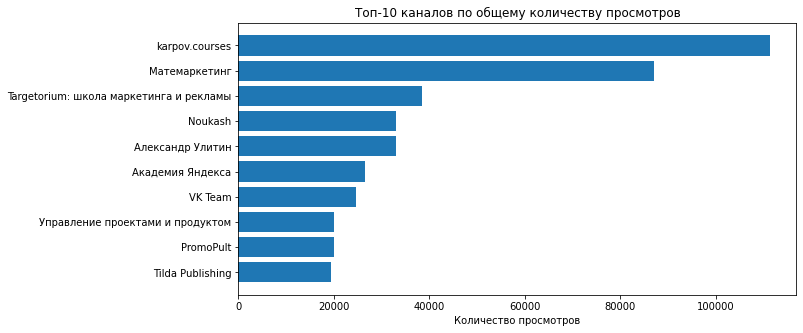

In [26]:
plt.barh(np.array(data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('Количество просмотров')
plt.title('Топ-10 каналов по общему количеству просмотров')
plt.show()

#### Топ-10 каналов по общему количеству лайков  

In [27]:
data['likeCount'] = data['likeCount'].fillna(0).astype(int)
data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             4306
Матемаркетинг                              2937
Noukash                                    1865
Targetorium: школа маркетинга и рекламы    1204
Михайло Дубчак                              987
Александр Улитин                            846
Академия Яндекса                            737
Управление проектами и продуктом            662
Трейдер АБ | Трейдинг и инвестиции`         566
Go Viral Central Asia                       537
Name: likeCount, dtype: int64

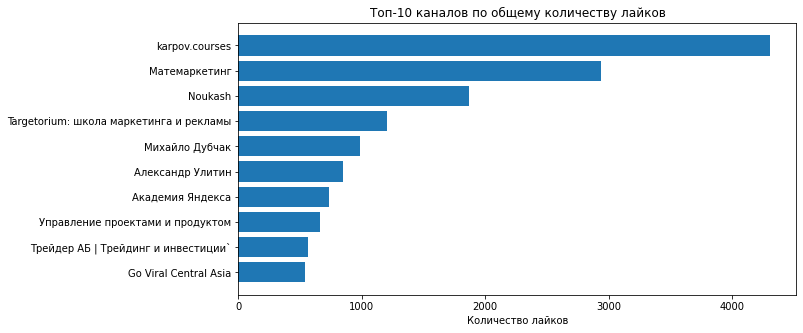

In [28]:
plt.barh(np.array(data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('Количество лайков')
plt.title('Топ-10 каналов по общему количеству лайков')
plt.show()

Как по общему количеству просмотров видео, входящих в топ-200 по запросу "а/б тестирование", так и по общему количеству лайков среди таких видео, наивысшие показатели имеют каналы "karpov.courses" и "Матемаркетинг". При этом, стоит отметить, что эти каналы входят в топ-5 каналов по количеству выпущенных видео на исследуемую тематику, попавших в топ-200 по просмотрам. В том числе по этой причине общее количество просмотров и лайков видео с этих каналов достаточно высокое. 

#### Топ-10 каналов по количеству выпущенных видео на исследуемую тематику, попавших в топ-200 по просмотрам

In [29]:
data.groupby('channelTitle')['kind'].count().sort_values(ascending = False).head(10)

channelTitle
Академія інтернет-маркетингу WebPromoExperts    8
Матемаркетинг                                   5
ASO секреты                                     5
karpov.courses                                  5
Productstar                                     4
PPC-SCI                                         4
Теплица социальных технологий                   4
Разработка                                      3
ProductSense                                    3
Kolesa Group                                    3
Name: kind, dtype: int64

In [30]:
data.groupby('channelTitle')['kind'].count().mean()

1.4705882352941178

#### Топ-10 каналов по общему количеству комментариев 

In [31]:
data['commentCount'] = data['commentCount'].fillna(0).astype(int)
data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             184
Noukash                                    133
Евгений Гришаков                           118
Михайло Дубчак                              84
Макс Слободянюк                             82
Targetorium: школа маркетинга и рекламы     73
Lead Genic                                  69
Даня Мыцык                                  63
Трейдер АБ | Трейдинг и инвестиции`         59
Матемаркетинг                               58
Name: commentCount, dtype: int64

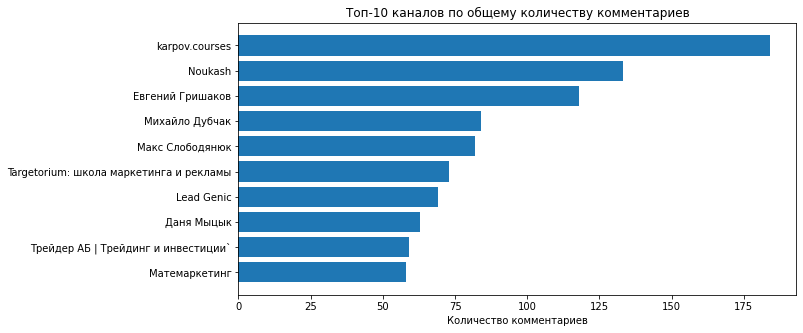

In [32]:
plt.barh(np.array(data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('Количество комментариев')
plt.title('Топ-10 каналов по общему количеству комментариев')
plt.show()

#### Топ-10 каналов по количеству просмотров на одно видео в среднем

In [33]:
data.groupby('channelTitle')['viewCount'].median().sort_values(ascending = False).head(10)

channelTitle
Targetorium: школа маркетинга и рекламы    38416.0
Александр Улитин                           32922.0
VK Team                                    24558.0
karpov.courses                             21011.0
Tilda Publishing                           19313.0
Михайло Дубчак                             19156.0
Computer Science Center                    17373.0
Алексей Ярошенко                           17130.0
Noukash                                    16508.0
Макс Слободянюк                            15711.0
Name: viewCount, dtype: float64

#### Топ-10 каналов по количеству лайков на одно видео в среднем

In [258]:
data.groupby('channelTitle')['likeCount'].median().sort_values(ascending = False).head(10)

channelTitle
Targetorium: школа маркетинга и рекламы    1204.0
Михайло Дубчак                              986.0
karpov.courses                              948.0
Noukash                                     888.5
Александр Улитин                            846.0
Go Viral Central Asia                       525.0
Skypro: онлайн-университет                  490.0
Евгений Гришаков                            436.0
Tilda Publishing                            384.0
Макс Слободянюк                             384.0
Name: likeCount, dtype: float64

Несмотря на то, что по общему количеству просмотров и лайков видео каналы "karpov.courses" и "Матемаркетинг" занимают первые позиции, в среднем одно видео на данных каналах собирает не так много просмотров и лайков. В первую тройку видео по среднему количеству просмотров вошли совсем другие каналы.

In [29]:
len(data[data.channelTitle == 'Targetorium: школа маркетинга и рекламы'])

1

Кроме того, из данных становится понятно, что на канале 'Targetorium: школа маркетинга и рекламы' вышло видео, которое единственное с данного канала попало в топ-200 по просмотрам в выдаче по исследуемому запросу, и набрало 1204 лайков. Проверим, наибольшее ли это число лайков среди всех видео топ-200. 

In [265]:
data.sort_values(by='likeCount', ascending = False)[['channelTitle','title', 'likeCount']].head(15)

,channelTitle,title,likeCount
1,karpov.courses,"Никита Маршалкин: A/B-тесты сложнее, чем кажет...",1863
0,Матемаркетинг,Анатолий Карпов - A/B-тестирование: как сделат...,1571
8,Noukash,A/B ТЕСТИРОВАНИЕ: Почему никто не делает его п...,1209
2,Targetorium: школа маркетинга и рекламы,Как правильно проводить рекламные тесты? Рекла...,1204
4,karpov.courses,Как и зачем оценивать размер выборки для A/B т...,1106
11,Михайло Дубчак,КАК ТЕСТИРОВАТЬ РЕКЛАМУ В ФЕЙСБУК И ИНСТАГРАМ?...,986
5,Матемаркетинг,Валерий Бабушкин - A/B-тестирования при невозм...,897
3,Александр Улитин,КАК ПРОВОДИТЬ A/B ТЕСТИРОВАНИЕ САЙТА?,846
9,karpov.courses,Тонкости A/B тестирования: проблема подглядыва...,790
7,Академия Яндекса,002. Увеличение чувствительности в A/B с помощ...,641


Видео с канала "Targetorium: школа маркетинга и рекламы" не является самым популярным по количеству лайков. Наиболее популярные видео были выложены на каналах "karpov.courses" и "Матемаркетинг". При этом, видео с канала "Матемаркетинг", получившее наибольшее число лайков, содержит выступление Анатолия Карпова, который является основателем "karpov.courses". Таким образом, два самых популярных видео по количеству лайков по теме а/б-тестирования создано при участии Анатолия Карпова и его команды, что может свидетельствовать о высоком уровне их компетенций в вопросах а/б-тестирования и высокой оценки их работы со стороны аудитории. 

#### Топ-10 каналов по количеству комментариев на одно видео в среднем 

In [46]:
data.groupby('channelTitle')['commentCount'].median().sort_values(ascending = False).head(10)

channelTitle
Евгений Гришаков                           118.0
Михайло Дубчак                              84.0
Макс Слободянюк                             82.0
Targetorium: школа маркетинга и рекламы     73.0
Lead Genic                                  69.0
Noukash                                     64.5
Даня Мыцык                                  63.0
karpov.courses                              41.5
Skypro: онлайн-университет                  38.0
Александр Улитин                            30.0
Name: commentCount, dtype: float64

In [50]:
data.sort_values(by='commentCount', ascending = False)[['channelTitle','title', 'commentCount']].head(15)

,channelTitle,title,commentCount
31,Евгений Гришаков,Как отслеживать и улучшать показатели игры? Ан...,118
7,Noukash,A/B ТЕСТИРОВАНИЕ: Почему никто не делает его п...,94
10,Михайло Дубчак,КАК ТЕСТИРОВАТЬ РЕКЛАМУ В ФЕЙСБУК И ИНСТАГРАМ?...,84
13,Макс Слободянюк,Как протестировать бизнес-идею? Поэтапный план...,82
2,Targetorium: школа маркетинга и рекламы,Как правильно проводить рекламные тесты? Рекла...,73
32,Lead Genic,Форма обратного звонка для сайта: создаем без ...,69
41,Даня Мыцык,💙А/Б ТЕСТИРОВАНИЕ В FACEBOOK|ОБЗОР ФУНКЦИИ|КАК...,63
1,karpov.courses,"Никита Маршалкин: A/B-тесты сложнее, чем кажет...",55
4,karpov.courses,Как и зачем оценивать размер выборки для A/B т...,50
0,Матемаркетинг,Анатолий Карпов - A/B-тестирование: как сделат...,41


Больше комментариев получают видео с прикладным содержанием, связанным с аналитикой игр, сайтов, рекламы, а не теоретические видео по А/Б-тестированию. 

#### Распределение видео по годам 

In [33]:
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['publishedAt_year'] = data['publishedAt'].dt.year

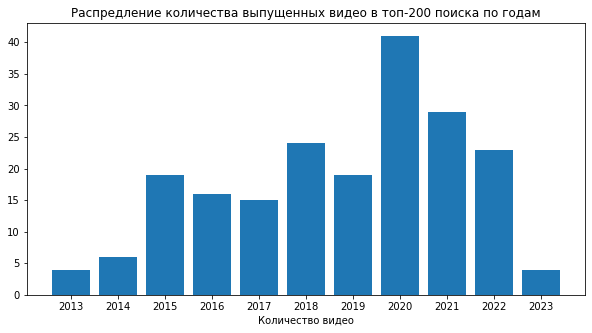

In [42]:
plt.bar(np.array(data.groupby('publishedAt_year')['kind'].count().index),
    np.array(data.groupby('publishedAt_year')['kind'].count().values))
plt.xticks(np.array(data.groupby('publishedAt_year')['kind'].count().index))
plt.xlabel('Количество видео')
plt.title('Распредление количества выпущенных видео в топ-200 поиска по годам')
plt.show()

Наибольшее количество видео среди топ-200 по запросу "а/б тестирование" было выпущено в 2020-2021 годах. Возможно, именно в этот период тема "а/б тестирования" пользовалась достаточной популярностью и по ней снимали много качественного контента. Кроме того, всплеск в 2020 году может быть обусловлен в том числе пандемией, в условиях которой у авторов видео могло быть больше времени для снятия контента на YouTube. 

#### Часто встречающиеся слова в названиях 

In [32]:
title_words = []
for title in data['title']: 
    for word in title.lower().split():
        title_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits)))

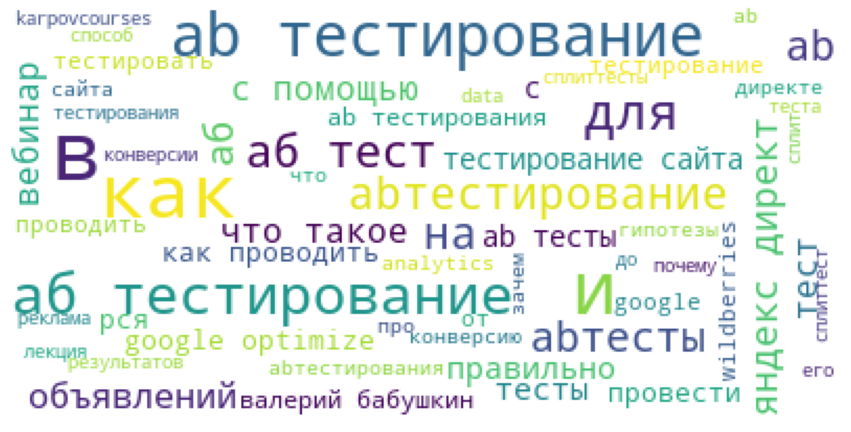

In [33]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(title_words))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

В названиях видео чаще всего по понятным причинам встречаются различные формы словосочетания "а/б тестирование". Кроме того, на основе облака слов можно сделать вывод, что в видео часто идет речь о том, что такое а/б тестирование, зачем и как его проводить, и как сделать это правильно. Именно эти вопросы в первую очередь волнуют людей, которые ищут материал на YouTube по теме а/б тестирования. 

Часть видео, которые попали в топ-200 по количеству просмотров YouTube по запросу "а/б тестирование", содержит материал о тестировании сайтов, а также, судя по облаку слов, используемых для этого инструментов, как например, Google Optimize. Следовательно, эта тема пользуется достаточно высоким интересом среди тех, кто ищет контент по а/б тестированию.

#### Часто встречающиеся слова в описании 

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

In [227]:
description_words = []
for description in data['description']: 
    for word in description.lower().split():
        title_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits)))
        title_words_filtered = filter(lambda x: x not in stop_words, title_words)

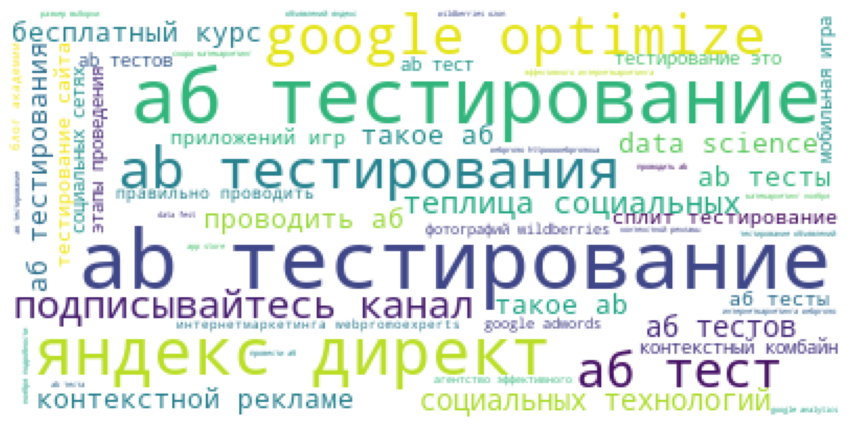

In [228]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(title_words_filtered))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Облако слов, составленное на основе описаний видео, попавших в топ-200, ещё тетче показывает, что в видео по а/б тестированию часто речь идет о том, как проводить тесты с помощью специальных инструментов, таких как Google Optimize, и средах, таких как Яндекс.Директ.

#### Часто встречающиеся слова в тегах

In [57]:
data['tags'] = data['tags'].fillna('')
tags_words = []
for tag in data['tags']: 
    for word in tag:
        tags_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits))) 

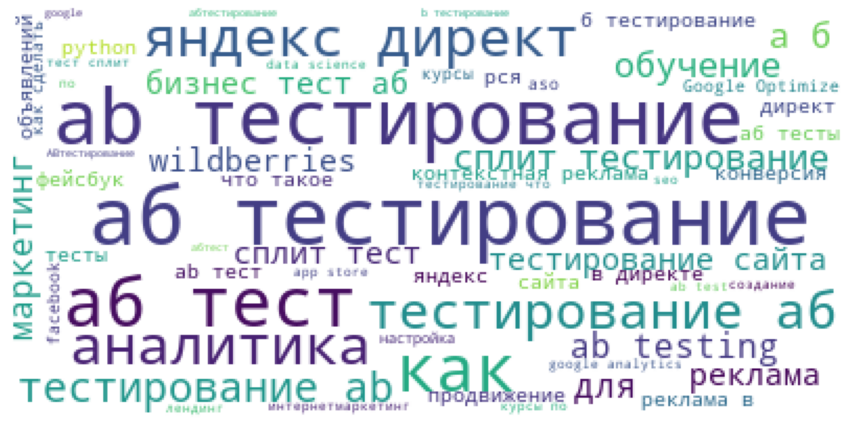

In [59]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(tags_words))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Облако слов по хештегам также демонстрирует популярность темы а/б тестирования в Яндекс.Директе, проведения а/б тестов для рекламы и объявлений, а также вопроса о том, как это все осуществлять. 